<a href="https://colab.research.google.com/github/abreham-gebremedin/Deep-learning-/blob/main/Next_Word_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abreham Gebremedin
 (https://abreham-gebremedin.herokuapp.com/)

# Next Word Prediction Model

In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
text = open('/content/drive/MyDrive/Colab Notebooks/text.txt', encoding='utf-8').read().lower()
print('Length:', len(text))

Length: 581888


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
# print(words)

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1
    
print(X[0][0])

[False False False ... False False False]


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.2, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


683/683 [==============================] - 242s 346ms/step - loss: 6.0710 - accuracy: 0.1034 - val_loss: 6.0596 - val_accuracy: 0.1209
Epoch 2/10
683/683 [==============================] - 231s 338ms/step - loss: 5.7055 - accuracy: 0.1464 - val_loss: 6.5072 - val_accuracy: 0.1226
Epoch 3/10
683/683 [==============================] - 230s 337ms/step - loss: 5.7361 - accuracy: 0.1752 - val_loss: 6.6701 - val_accuracy: 0.1286
Epoch 4/10
683/683 [==============================] - 231s 338ms/step - loss: 5.4500 - accuracy: 0.2130 - val_loss: 6.8110 - val_accuracy: 0.1269
Epoch 5/10
683/683 [==============================] - 231s 339ms/step - loss: 5.1280 - accuracy: 0.2582 - val_loss: 6.9346 - val_accuracy: 0.1126
Epoch 6/10
683/683 [==============================] - 231s 338ms/step - loss: 4.8395 - accuracy: 0.3022 - val_loss: 7.0422 - val_accuracy: 0.1144
Epoch 7/10
683/683 [==============================] - 231s 338ms/step - loss: 4.6143 - accuracy: 0.3453 - val_loss: 7.2451 - val_accura

In [ ]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [ ]:
history

{'accuracy': [0.1033693477511406,
  0.1464017629623413,
  0.17517396807670593,
  0.21298754215240479,
  0.25820592045783997,
  0.30221113562583923,
  0.34528931975364685,
  0.38520875573158264,
  0.4213514029979706,
  0.45557132363319397],
 'loss': [6.07101583480835,
  5.705506801605225,
  5.7360758781433105,
  5.449987888336182,
  5.1280436515808105,
  4.839506149291992,
  4.614306926727295,
  4.422661304473877,
  4.265375137329102,
  4.125887870788574],
 'val_accuracy': [0.12094300985336304,
  0.12259098142385483,
  0.1285877823829651,
  0.1269398033618927,
  0.11261158436536789,
  0.11439688503742218,
  0.10872053354978561,
  0.10601968318223953,
  0.09933622926473618,
  0.0945754200220108],
 'val_loss': [6.059567928314209,
  6.507239818572998,
  6.670144081115723,
  6.811039924621582,
  6.934574604034424,
  7.042150020599365,
  7.245062351226807,
  7.263159275054932,
  7.365506172180176,
  7.441892623901367]}

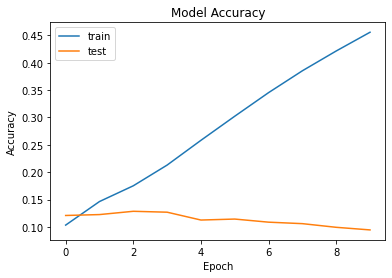

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

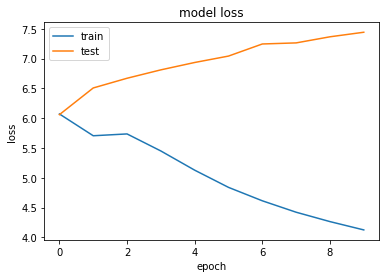

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')